In [1]:
%matplotlib inline
import numpy as np
from pymt.models import PRMSSurface, PRMSSoil, PRMSGroundwater, PRMSStreamflow
from pathlib import Path
import geopandas as gpd
import pandas as pd
import helper

➡ models: Avulsion, Plume, Sedflux3D, Subside, Rafem, PRMSSurface, PRMSStreamflow, PRMSSoil, PRMSGroundwater, FrostNumber, Ku, Hydrotrend, GIPL, ECSimpleSnow, Cem, Waves


In [2]:
run_dir = '../prms/pipestem'
config_surf= 'control_surface.simple1'
config_soil = 'control_soil.simple1'

print(Path(run_dir).exists())
print((Path(run_dir) / config_surf).exists())
print((Path(run_dir) / config_soil).exists())

msurf = PRMSSurface()
msoil = PRMSSoil()

print(msurf.name, msoil.name)


True
True
True
prms6-surface-BMI prms6-BMI-SOIL


In [3]:
msurf.initialize(config_surf, run_dir)
msoil.initialize(config_soil, run_dir)

In [4]:
soil_input_cond_vars = ['soil_rechr_chg', 'soil_moist_chg']

surf2soil_vars = ['hru_ppt', 'dprst_evap_hru', 
                   'dprst_seep_hru', 'infil', 'sroff','potet', 'hru_intcpevap', 
                   'snow_evap', 'snowcov_area', 'soil_rechr', 'soil_rechr_max', 
                   'soil_moist', 'soil_moist_max', 'hru_impervevap']

soilinput_vars = ['hru_area_perv', 'hru_frac_perv', 'srunoff_updated_soil', 'transp_on']

soil2surf_vars = ['infil', 'sroff', 'soil_rechr', 'soil_moist']

surf2gw_vars = ['pkwater_equiv', 'dprst_seep_hru', 'dprst_stor_hru', 'hru_intcpstor',
               'hru_impervstor', 'sroff']

soil2gw_vars = ['soil_moist_tot', 'soil_to_gw', 'ssr_to_gw', 'ssres_flow']

surf2sf_vars = ['potet', 'swrad', 'sroff']

soil2sf_vars = ['ssres_flow']

gw2sf_vars = ['gwres_flow']

def soilinput(msurf, msoil, exch_vars):
    for var in exch_vars:
        print(var)
        msoil.set_value(var, msurf.get_value(var))
            
def soilexchange(msurf, msoil, exch_vars, cond_vars, dprst_flag, imperv_flag):
    for var in exch_vars:
        print(var)
        msoil.set_value(var, msurf.get_value_ptr(var))
    if dprst_flag in [1, 3] or imperv_flag in [1, 3]:
        for var in cond_vars:
            msoil.set_value(var, msurf.get_value_ptr(var))

# def soil2surface(msoil, msurf, exch_vars):
#     for var in exch_vars:
#         msurf.set_value(var, msoil.get_value(var))
        
# def gwinput(msurf, msoil, mgw, surf_vars, soil_vars):
#     for var in surf_vars:
#         mgw.set_value(var, msurf.get_value(var))
#     for var in soil_vars:
#         mgw.set_value(var, msoil.get_value(var))
        
# def sfinput(msurf, msoil, mgw, msf, surf_vars, soil_vars, gw_vars):
#     for var in surf_vars:
#         msf.set_value(var, msurf.get_value(var))
#     for var in soil_vars:
#         msf.set_value(var, msoil.get_value(var))
#     for var in gw_vars:
#         msf.set_value(var, mgw.get_value(var))

dprst_flag = msoil.get_value('dyn_dprst_flag')
imperv_flag = msoil.get_value('dyn_imperv_flag')
soilinput(msurf, msoil, soilinput_vars)
soilexchange(msurf, msoil, surf2soil_vars, soil_input_cond_vars, dprst_flag, imperv_flag)
def update_coupled(msurf, msoil):
    msurf.update()
    msoil.update()
          

hru_area_perv
hru_frac_perv
srunoff_updated_soil
transp_on
hru_ppt
dprst_evap_hru
dprst_seep_hru
infil
sroff
potet
hru_intcpevap
snow_evap
snowcov_area
soil_rechr
soil_rechr_max
soil_moist
soil_moist_max
hru_impervevap


In [5]:
for i in range(int(msurf.start_time),int(msurf.end_time)):
    update_coupled(msurf, msoil)

In [7]:
# CSDMS JupyterHub set path to HRU and streamsegment shapefiles
hru_shp = '/data/prms/GIS/nhru_10U.shp'
hru_strmseg = '/data/prms/GIS/nsegment_10U.shp'
# set path to Gridmet weights file for mapping Gridmet gridded data to HRU
weight_file = '/data/prms/weights.csv'

# If using notebook not in CSDMS JupyterHub.  See README for instruction on where to 
# get the data and  uncomment out the following lines
# hru_shp = './GIS/nhru_10U.shp'
# hru_strmseg = './GIS/nsegment_10U.shp'
# # set path to Gridmet weights file for mapping Gridmet gridded data to HRU
# weight_file = './GIS/weights.csv'

gdf_ps = helper.get_gdf(hru_shp, msurf)

In [8]:
msurf.finalize()
msoil.finalize()

NameError: name 'mgw' is not defined

In [9]:
import xarray as xr
soil_file = Path('../prms/pipestem/output/summary_soil_daily.nc')
surf_file = Path('../prms/pipestem/output/summary_surf_daily.nc')

prms_file = Path('../prms/pipestem/output/summary_prms_daily.nc')
clim_file = Path('../prms/pipestem/daymet.nc')
dsoil = xr.open_dataset(soil_file)
dprms = xr.open_dataset(prms_file)
dsurf = xr.open_dataset(surf_file)

clim = xr.open_dataset(clim_file)

In [10]:
sim_start_date = dsoil.time.min()
sim_end_date = dsoil.time.max()

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

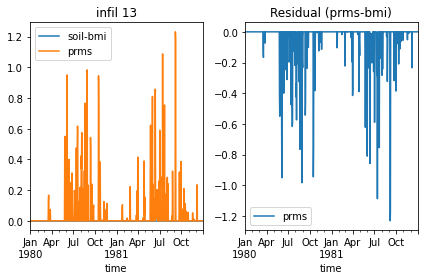

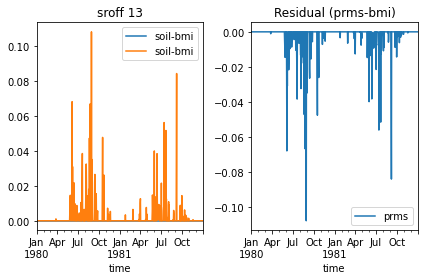

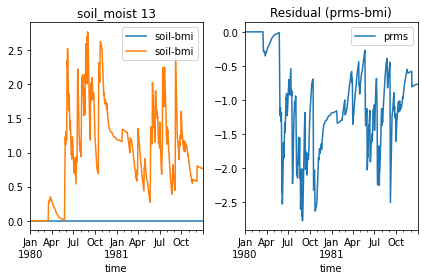

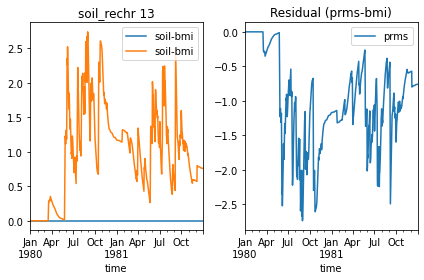

In [13]:
from helper import bmi_prms6_value_plot, bmi_prms6_residual_plot
import matplotlib.pyplot as plt
import matplotlib
t_hru = 13

fig, ax = plt.subplots(ncols=2)
bmi_prms6_value_plot(dsoil, t_hru, 'infil', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_value_plot(dprms, t_hru, 'infil', 'prms', sim_start_date, sim_end_date, ax[0])
bmi_prms6_residual_plot(dsoil, dprms, t_hru, 'infil', 'prms', sim_start_date, sim_end_date, ax[1])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=2)
bmi_prms6_value_plot(dsoil, t_hru, 'sroff', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_value_plot(dprms, t_hru, 'sroff', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_residual_plot(dsoil, dprms, t_hru, 'sroff', 'prms', sim_start_date, sim_end_date, ax[1])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=2)
bmi_prms6_value_plot(dsoil, t_hru, 'soil_moist', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_value_plot(dprms, t_hru, 'soil_moist', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_residual_plot(dsoil, dprms, t_hru, 'soil_moist', 'prms', sim_start_date, sim_end_date, ax[1])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=2)
bmi_prms6_value_plot(dsoil, t_hru, 'soil_rechr', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_value_plot(dprms, t_hru, 'soil_rechr', 'soil-bmi', sim_start_date, sim_end_date, ax[0])
bmi_prms6_residual_plot(dsoil, dprms, t_hru, 'soil_rechr', 'prms', sim_start_date, sim_end_date, ax[1])
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)
plt.tight_layout()
plt.show()
